#### 幾何布朗運動模擬公式（離散版本）

我們在電腦中無法真的處理連續時間的隨機微分方程，但我們可以做近似模擬（Euler-Maruyama 方法）：
$$
S_{t+\Delta t} = S_t \cdot \exp\left( \left(\mu - \frac{1}{2}\sigma^2\right)\Delta t + \sigma \sqrt{\Delta t} \cdot Z_t \right)
$$

其中：
- $S_t$：資產價格在時間 $t$ 的值
- $\mu$：
- $\sigma$：波動率（volatility）
- $Z_t \sim \mathcal{N}(0,1)$：標準常態隨機數
- $\Delta t$：時間步長（例如 1/252，一個交易日）

補充：
- mu 是年化期望報酬率（μ 期望值) aka. 平均回報率
- sigma 是年化波動率（σ 標準差) aka. 隨機波動率
- 變異數(Variance) 資料（隨機變數）分散程度」的量化，資料點離平均值的「平方平均距離」，單位是原資料單位的平方（不直觀）。
- 標準差(sigma)是變異數開根號後的值：
- 計算一組資料的標準差(standard deviation)，也就是「資料分散程度」的度量。在這裡是指波動率

### Monte Carlo 模擬 & 繪製走勢圖

In [7]:
import pandas as pd
import yfinance as yf
import math
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
from IPython.display import display

def import_stock_data(ticker, start, end):
    data = pd.DataFrame()
    stock = yf.Ticker(ticker)
    data = stock.history(start=start, end=end)
    return data

def log_returns(stock_data):
    log_returns = np.log(1 + stock_data['Close'].pct_change()) # 計算收盤價的日報酬率，再取 natural log。
    log_returns = log_returns[1:] # 由於第一筆資料的 pct_change() 是 NaN（因為沒有前一天比較），將第一筆丟掉。
    return log_returns

def monte_carlo_with_gbm(mu, sigma, data):
    dt = gbm.T / gbm.M 
    S = np.zeros((gbm.M + 1, gbm.I)) # (rows, columns)
    S[0] = data['Close'].iloc[-1] # 最後一筆收盤價 

    for t in range(1, gbm.M + 1):
        S[t] = S[t - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt 
            + sigma * math.sqrt(dt) * np.random.standard_normal(gbm.I))
    return S

@dataclass
class gbm:
    # TODO: 明確解釋參數的意義
    T = 1
    I = 1000    # 要模擬幾條資產價格路徑
    M = 252 * T # 模擬期間交易日

@dataclass
class ticker:
    name = ''
    start = '2020-5-30'
    end = '2025-6-1'

if __name__ == '__main__':
    ticker.name = 'TSLA' # 給定任意 ticker
    data = import_stock_data(ticker.name, ticker.start, ticker.end)

    # @log_return: 取得個股資料，並且計算收盤價的日報酬率，再取 natural log。取對數是為了後續方便計算
    # @mu: 個股過去期間期年化期望報酬率（μ 期望值) 即平均回報，其中乘以 252 是為了要變年化
    # @sigma: 個股過去期間期年化波動率（σ 標準差) 即隨機波動率，其中乘以根號 252 是為了要變年化
    log_return = log_returns(data)
    mu = np.mean(log_return) * 252
    sigma = np.std(log_return) * math.sqrt(252)

    s = monte_carlo_with_gbm(mu, sigma, data)

    prices_df = pd.DataFrame(s.round(2)) # 將模擬結果 S 轉換為 DataFrame
    prices_df.columns = [f"Path {i + 1}" for i in range(gbm.I)] # 調整顯示設定
    display(prices_df) # 明確要求顯示於 cell

,Path 1,Path 2,Path 3,Path 4,Path 5,Path 6,Path 7,Path 8,Path 9,Path 10,...,Path 991,Path 992,Path 993,Path 994,Path 995,Path 996,Path 997,Path 998,Path 999,Path 1000
0,346.46,346.46,346.46,346.46,346.46,346.46,346.46,346.46,346.46,346.46,...,346.46,346.46,346.46,346.46,346.46,346.46,346.46,346.46,346.46,346.46
1,331.14,313.10,369.49,322.15,356.23,331.05,329.60,343.88,355.56,343.69,...,334.39,325.64,340.34,374.27,354.11,329.58,340.84,342.57,322.78,375.57
2,305.54,321.59,350.47,326.57,393.81,344.42,310.85,327.32,346.58,344.68,...,339.87,328.63,323.38,375.04,398.88,314.31,319.51,360.02,322.16,415.45
3,327.42,325.68,345.34,334.74,382.10,362.82,281.56,336.05,334.29,332.58,...,335.44,329.65,344.13,372.29,400.53,280.38,332.56,377.81,331.33,426.26
4,327.56,315.81,353.70,321.01,390.91,357.47,277.01,328.14,354.53,336.83,...,325.70,318.26,386.55,363.59,400.20,289.61,332.04,399.84,350.17,448.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,471.04,539.82,216.20,45.51,467.93,447.41,719.27,825.19,748.09,422.72,...,557.85,354.68,187.42,877.22,964.66,423.17,412.90,415.80,713.21,509.74
249,439.59,576.63,220.15,45.71,452.87,415.64,708.24,835.61,746.39,428.06,...,593.61,363.75,175.36,879.19,987.53,387.21,422.95,391.34,688.81,532.23
250,442.37,583.35,203.58,43.91,453.08,394.17,639.43,880.80,755.72,398.43,...,596.98,355.57,177.57,865.82,995.39,366.84,462.87,367.64,706.40,539.40
251,452.64,613.15,199.24,42.32,437.00,419.80,639.90,857.75,734.75,407.80,...,634.48,390.19,177.32,870.94,984.04,374.16,471.55,381.83,673.46,559.75


### 歷史股價

In [8]:
data.round(1) # 該個股過去的紀錄，在後續只使用 Close，也就是收盤價。

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-01 00:00:00-04:00,57.2,59.9,56.9,59.9,224092500,0.0,0.0
2020-06-02 00:00:00-04:00,59.6,60.6,58.1,58.8,203484000,0.0,0.0
2020-06-03 00:00:00-04:00,59.2,59.9,58.7,58.9,119242500,0.0,0.0
2020-06-04 00:00:00-04:00,59.3,59.7,57.2,57.6,133315500,0.0,0.0
2020-06-05 00:00:00-04:00,58.5,59.1,57.7,59.0,117178500,0.0,0.0
...,...,...,...,...,...,...,...
2025-05-23 00:00:00-04:00,337.9,343.2,333.2,339.3,84654800,0.0,0.0
2025-05-27 00:00:00-04:00,347.4,363.8,347.3,362.9,120146400,0.0,0.0
2025-05-28 00:00:00-04:00,364.8,365.0,355.9,356.9,91404300,0.0,0.0


### 繪製模擬直方圖、走勢圖

TSLA 1000 次模擬後的平均值： 488.05


Text(0, 0.5, 'Price')

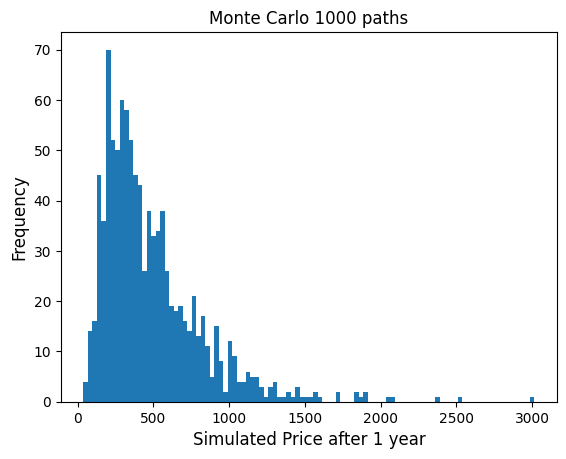

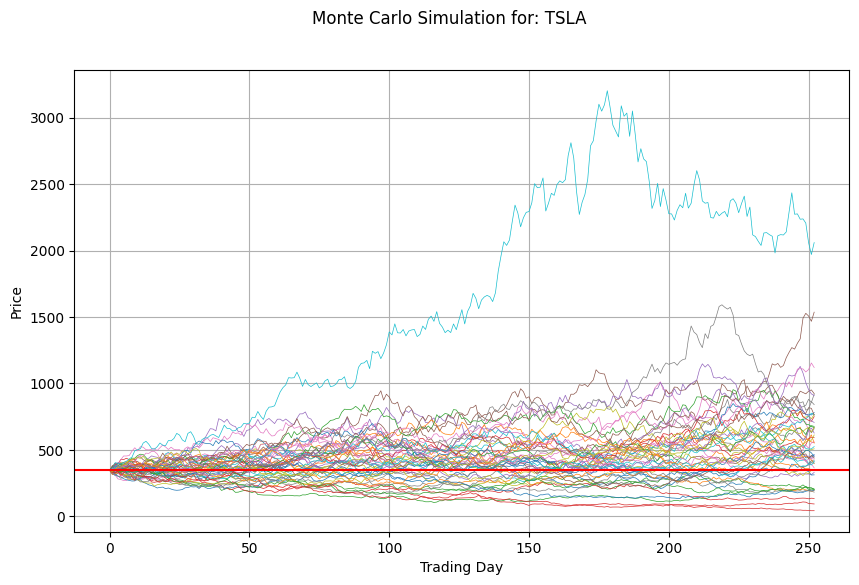

In [9]:
print(f"{ticker.name} {gbm.I} 次模擬後的平均值：", np.mean(s[-1]).round(2))

# 直方圖
plt.title(f'Monte Carlo {gbm.I} paths', fontsize=12)
plt.xlabel(f'Simulated Price after {gbm.T} year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.hist(s[-1], bins=100)

# 走勢圖
last_price = data['Close'].iloc[-1]
plt.figure(figsize=(10, 6))
plt.plot(s[:, :50], lw=0.5)
plt.suptitle(f'Monte Carlo Simulation for: {ticker.name}')
plt.axhline(y = last_price, color = 'r', linestyle= '-')
plt.grid(True)
plt.xlabel('Trading Day')
plt.ylabel('Price')